In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
federer = pd.read_csv('federer.csv', date_parser=['start date'], dayfirst = True)

In [3]:
federer.head()

,Unnamed: 0,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
federer.shape

(1179, 71)

In [5]:
federer.dtypes

Unnamed: 0                              int64
year                                    int64
tournament                             object
start date                             object
type                                   object
                                       ...   
player2 total service points total    float64
player2 total return points won       float64
player2 total return points total     float64
player2 total points won              float64
player2 total points total            float64
Length: 71, dtype: object

In [6]:
federer.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1179.0,589.000000,340.492291,0.0,294.5,589.0,883.5,1178.0
year,1179.0,2005.822731,3.893527,1998.0,2003.0,2006.0,2009.0,2012.0
atp ranking,1177.0,15.402719,61.331354,1.0,1.0,2.0,6.0,878.0
time,1179.0,88.014419,50.208925,0.0,63.0,86.0,116.0,305.0
player1 aces,1027.0,7.658228,4.791261,0.0,4.0,7.0,10.0,50.0
player1 double faults,1027.0,1.972736,1.927344,0.0,1.0,1.0,3.0,12.0
player1 1st serves in,1027.0,48.074976,17.828652,3.0,35.5,45.0,57.0,127.0
player1 1st serves total,1027.0,78.050633,28.282779,5.0,57.0,73.0,93.0,197.0
player1 1st serve points won,1027.0,36.891918,13.340020,2.0,27.0,35.0,44.0,113.0
player1 1st serve points total,1027.0,48.074976,17.828652,3.0,35.5,45.0,57.0,127.0


In [7]:
federer.isnull().sum()

Unnamed: 0                              0
year                                    0
tournament                              0
start date                              0
type                                    0
                                     ... 
player2 total service points total    152
player2 total return points won       152
player2 total return points total     152
player2 total points won              152
player2 total points total            152
Length: 71, dtype: int64

In [8]:
federer.isna().sum()

Unnamed: 0                              0
year                                    0
tournament                              0
start date                              0
type                                    0
                                     ... 
player2 total service points total    152
player2 total return points won       152
player2 total return points total     152
player2 total points won              152
player2 total points total            152
Length: 71, dtype: int64

<AxesSubplot:>

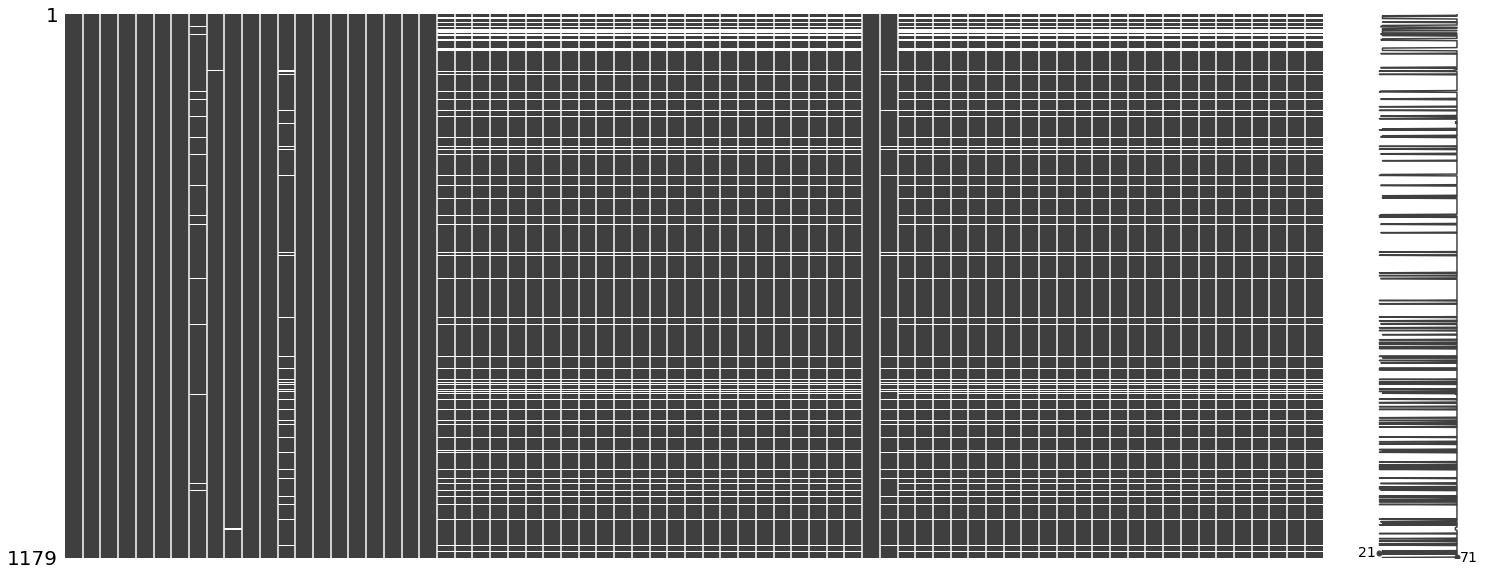

In [9]:
msno.matrix(federer)

In [10]:
corr_matrix = federer.corr()

<AxesSubplot:>

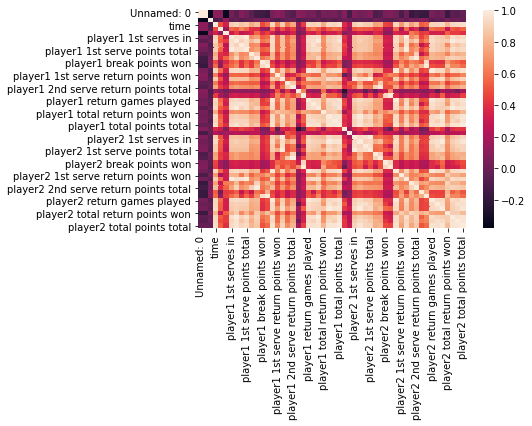

In [11]:
sns.heatmap(corr_matrix)

In [12]:
corr_matrix.stack()

Unnamed: 0                  Unnamed: 0                            1.000000
                            year                                  0.996589
                            atp ranking                          -0.345698
                            time                                  0.108946
                            player1 aces                          0.086641
                                                                    ...   
player2 total points total  player2 total service points total    0.974670
                            player2 total return points won       0.823525
                            player2 total return points total     0.972027
                            player2 total points won              0.973941
                            player2 total points total            1.000000
Length: 2704, dtype: float64

In [13]:
player = 'Roger Federer'

In [14]:
federer.loc[:, "win"] = federer.loc[:, "winner"] == player 

In [15]:
federer.loc[:, "win"].head()

0    False
1     True
2     True
3    False
4    False
Name: win, dtype: bool

In [16]:
federer.loc[:, "win"].mean()

0.8244274809160306

In [17]:
federer.loc[:, 'dbFaults'] = federer.loc[:, 'player1 double faults']/federer.loc[:, 'player1 total points total']

In [18]:
federer.loc[:, 'dbFaults'].head()

0    0.019417
1    0.000000
2    0.020270
3    0.046154
4         NaN
Name: dbFaults, dtype: float64

In [19]:
federer.groupby('surface')['win'].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [20]:
gb = federer.groupby('year')

In [21]:
date = federer.loc[:,'start date']

In [22]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.8.5.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.4.0-62-generic
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.0.5
numpy            : 1.19.1
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.1.1
setuptools       : 49.2.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.5.2
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.16.1
pandas_datareader: 0.9.0
bs4              : None
bottleneck       : None
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.5.2
matplotlib       : 3.3.0
numexpr       

/usr/local/lib/python3.8/dist-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


(0.0, 0.06363636363636364)

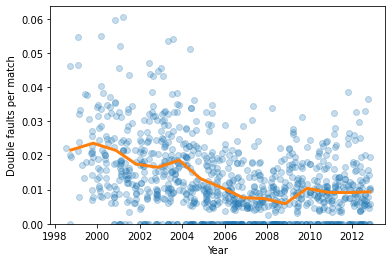

In [39]:
fig, ax = plt.subplots(1, 1)

ax.plot_date(date.astype('datetime64'), federer['dbFaults'],
             alpha=.25, lw=0)
ax.plot_date(gb['start date'].max().astype('datetime64'),
             gb['dbFaults'].mean(), '-', lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Double faults per match')
ax.set_ylim(0)